In [57]:
#Background Description Of The Problem
#India needs to feed a growing population but the land for agriculture has been decreasing due to the development 
#of India. Additionally, this changing socio economic scene is causing a change in the quantity of food demand.
#Thus we decided to create a model to further investigate the relationships between the amount of agricultural land 
#and significant socio economic factors (e.g population, unemployment,GDP per capita.)  


In [58]:
#Problem statement
#How may the available agricultural land area in India change due to present day socio-economic factors?

In [59]:
#User Persona
#How can the India government utilize this model to predict the amount of agricultural land available for crop 
#production so as to better allocate the land to better serve the demands of the masses. 


In [60]:
# while land of agricultural can be impacted by a multitude of factors, the significance of socioeconomic factors
#is large but often more embeded and harder to tell. Thus we thought it would be meaningful to model the possible
#socio economic factors and use them to predict the land for agriculture. 

#we decided to model land of agricultural of india against unemployment, per cpaita income,and population
#of India.

#Reason for unemployment as a variable:as unemployment changes it suggest that formal employment is affected and 
#there are varying number of people in india in informal jobs like farming this would indicate a change in the 
#labor in the agricultural sector thus possibly impacting the land allocated ) 

#Reason for per capita income(reflects the people standard of living the higher the per capita income suggest better 
#SOLwhich may affect the ability to afford agricultural products thus this may positively or negative affect the 
#agricultural land in India)

#Reason for population of India (affect the demand of agricultural products thus affecting the land allocated)   


In [61]:
#analysis of the datasets 
#we decided to plot the agricultural land against each dataset to narrow down on the possible 
#relationship between the target and each variable.

#to do so we have to first clean the datasets we have

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:

# Read the CSV file
df = pd.read_csv("agricultural land available.csv")
col_list = list(df.columns)
# print(col_list.index("1991")) #35
# print(col_list.index("2021")) #66
# area_of_india = 3287 * (10**8)
columns = col_list[35:66]
land_avail = df.loc[df["Country Name"] == "India", columns]
land_avail_trans = land_avail.transpose()
land_avail_trans = land_avail_trans.rename(columns={109: "Land Area/Ha (Y)"})
# print(land_avail_trans[109])
# final_land_data = land_avail_trans["Land Area/Ha (Y)"].apply(lambda x: x*area_of_india)

df = pd.read_csv("indian population new.csv")
#print(df[df['Year'] == 1991].index) #41
#print(df[df['Year'] == 2021].index) #71
df = df.loc[41:71]
population = df.loc[:, ["Population"]]
population['Population']=population['Population'].str.replace(',','')
population['Population'] = population['Population'].apply(lambda x: int(x))
population = population.rename(columns={"Population": "Population (X3)"})



df = pd.read_csv("Indias GDP and Per Capita.csv")
#print(df[df['Year'] == 1991].index) #31
per_cap = df.loc[31:, ["Per Capita Income($)"]]
per_cap = per_cap.rename(columns={"Per Capita Income($)": "Per Capita Income($) (X2)"})
#print(type(per_cap))

df = pd.read_csv("unemplyment data.csv")
col_list = list(df.columns)
#print(col_list.index("1991"))
#print(col_list.index("2021"))
columns = col_list[35:66]
unemployment = df.loc[df["Country Name"] == "India", columns]
unemployment_trans = unemployment.transpose()
unemployment = unemployment_trans.rename(columns={109: "Unemployment(X4)"})

#print(land_avail_trans)

df = pd.concat([land_avail_trans.reset_index(drop=True), population.reset_index(drop=True),per_cap.reset_index(drop=True),unemployment.reset_index(drop=True)], axis=1)
#print(df)

# Extract the features and the targets
df_independent, df_dependent = df[['Per Capita Income($) (X2)', 'Population (X3)', 'Unemployment(X4)']] , df[['Land Area/Ha (Y)']]

#Transform Temperature to Temperature^2
#Temp_sq = transform_features(df_features, 'Temperature (X1)', 'Temperature^2 (X1)^2')



print(df_dependent)
print(df_independent)

    Land Area/Ha (Y)
0          61.074469
1          60.979958
2          61.005856
3          60.975249
4          60.858875
5          60.739139
6          60.870984
7          60.834995
8          60.884437
9          60.868966
10         60.704832
11         60.729385
12         60.624783
13         60.667162
14         60.583414
15         60.509419
16         60.413226
17         60.459305
18         60.563906
19         60.397418
20         60.430043
21         60.420626
22         60.439461
23         60.449551
24         60.431725
25         60.399100
26         60.283939
27         60.243565
28         60.219813
29         60.045863
30         60.045926
    Per Capita Income($) (X2)  Population (X3)  Unemployment(X4)
0                         303        888941756             6.737
1                         317        907574049             6.815
2                         301        926351297             6.798
3                         346        945261958             6.830
4  

Text(0, 0.5, 'agricultural land area/HA')

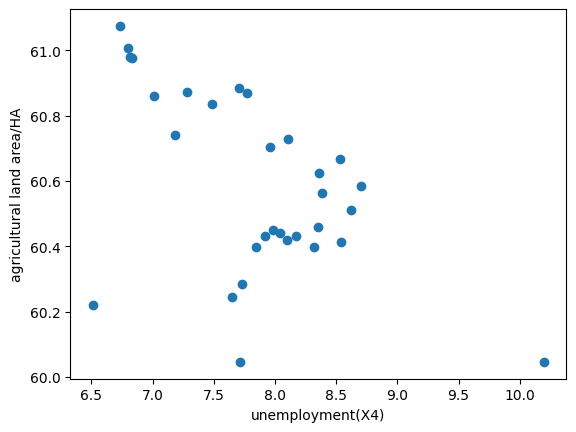

In [64]:
#plotting of land area against unemployment
plt.scatter(df_independent['Unemployment(X4)'],df_dependent)
plt.xlabel('unemployment(X4)')
plt.ylabel('agricultural land area/HA')

In [65]:
#from the graph above we narrowed down the relationship between agricultural land and unemployment to linear
#or ln relationship

Text(0, 0.5, 'agricultural land area/HA')

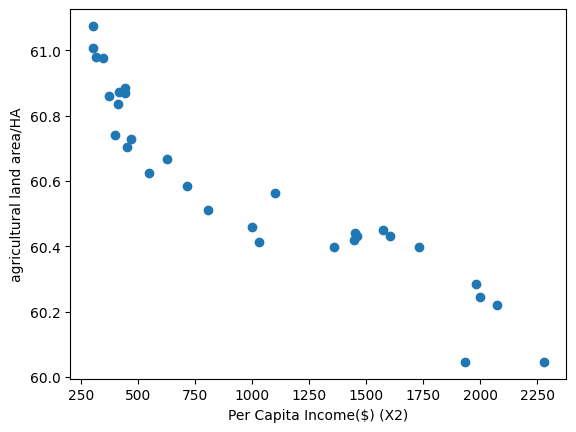

In [66]:
#plotting of agricultural land against per capita income
plt.scatter(df_independent['Per Capita Income($) (X2)'],df_dependent)
plt.xlabel('Per Capita Income($) (X2)')
plt.ylabel('agricultural land area/HA')

Text(0, 0.5, 'agricultural land area/HA')

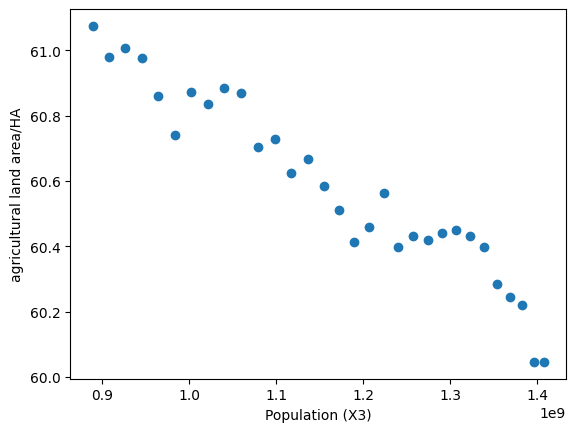

In [67]:
#plotting of agricultural land against population
plt.scatter(df_independent['Population (X3)'],df_dependent)
plt.xlabel('Population (X3)')
plt.ylabel('agricultural land area/HA')

In [68]:
#from the graph above we narrowed down the relationship between agricultural land and unemployment to linear relationship

In [69]:
#from all of this we created our first and most basic model modelling agricultural land against all the variables
#linearly. 

In [70]:
#functions we will be using for linear regression
# 2 main differences will be the modification of the transform features to be able to handle ln and exponential 
#transformation

def normalize_z(dfin, columns_means=None, columns_stds=None):
    
    if columns_means is None:
        columns_means = dfin.mean(axis = 0)
    if columns_stds is None:
        columns_stds = dfin.std(axis = 0)
    dfout = (dfin - np.array(columns_means)) / np.array(columns_stds)

    return dfout, columns_means, columns_stds

def get_features_targets(df, feature_names, target_names):
    
    df_feature = df[feature_names]
    df_target = df[target_names]
    
    return df_feature, df_target

def prepare_feature(df_feature):
    
    m = df_feature.shape[0]
    if isinstance(df_feature, pd.DataFrame):
        np_feature = df_feature.to_numpy()
    else:
        np_feature = df_feature
    X = np.concatenate((np.ones((m,1)), np_feature), axis = 1)
    return X
    
def prepare_target(df_target):
    
    m = df_target.shape[0]
    if isinstance(df_target, pd.DataFrame):
        np_target = df_target.to_numpy()
    else:
        np_target = df_target
    return np_target
    
def predict_linreg(df_feature, beta, means=None, stds=None):
    
    feature, _, _ = normalize_z(df_feature, means, stds)
    X = prepare_feature(feature)
    y_pred = calc_linreg(X, beta)
    return y_pred
    
def calc_linreg(X, beta):
    
    y_pred = X @ beta
    #y = np.matmul(X,b)
    return y_pred
    
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    
    indexes = df_feature.index
    k = int(len(indexes) * test_size)
    if random_state is not None:
        np.random.seed(random_state)
    test_indexes = np.random.choice(indexes, k, replace = False)
    
    #ways to convert train_indexes into list
    train_indexes = list(set(indexes) - set(test_indexes))
    #train_indexes = list(filter(lambda x: x not in test_indexes ,indexes))
    #train_indexes = [i for i in indexes if not in test_index]
    
    df_feature_train = df_feature.loc[train_indexes, :]
    df_target_train = df_target.loc[train_indexes, :]
    df_feature_test = df_feature.loc[test_indexes, :]
    df_target_test = df_target.loc[test_indexes, :]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    
    error = y - ypred
    SS_res = np.sum(error**2) #np.sum(np.square(error))
    y_avg = np.mean(y) 
    diff = y - y_avg
    SS_tot = np.sum(diff**2)
    r2 = 1 - (SS_res / SS_tot)
    return r2
    
def mean_squared_error(target, pred):
    target_z,_,_ = normalize_z(target)
    pred_z,_,_ = normalize_z(pred)
    diff_2 = target_z - pred_z
    MSE = np.mean(np.square(diff_2))
    return MSE
    
def transform_features_cube(df_feature, colname, colname_transformed_2, colname_transformed_3):
    
    df_feature[colname_transformed_2]=df_feature[colname] ** 2
    df_feature[colname_transformed_3] = df_feature[colname] ** 3
    
    return df_feature

def transform_features_ln(df_feature, colname, colname_transformed):

    df_feature[colname_transformed] = np.log(df_feature[colname])
    df_feature=df_feature.drop(columns=[colname])
    return df_feature

def adjusted_r(r_square, target,features):
    return 1-((1-r_square)*(target-1)/(target-features-1))

In [71]:
def compute_cost_linreg(X, y, beta):
    J = 0
    ###
    m = X.shape[0]
    y_pred = calc_linreg(X, beta)
    error = y_pred - y
    cost = 1/(2*m) * (error.T @ error) # 1x1 matrix
    # J = 1/(2*m) * np.matmul(error.T, error)
    J = cost[0,0]
    ###
    return J

In [72]:
def gradient_descent_linreg(X, y, beta, alpha, num_iters):
    J_storage = []
    m = X.shape[0]
    for i in range(num_iters):
        y_pred = calc_linreg(X,beta)
        error = y_pred - y
        dev = X.T @ error
        beta = beta - (alpha/m) * dev
        cost = compute_cost_linreg(X, y, beta)
        J_storage.append(cost)
    ###
    return beta, np.array(J_storage)

In [73]:
# Process of linear regression model training
model1_indep = df_independent.loc[:,['Per Capita Income($) (X2)', 'Population (X3)', 'Unemployment(X4)']]
print(model1_indep)
# split the data into training and test sets
df_indep_train, df_indep_test, df_dep_train, df_dep_test = split_data(model1_indep, df_dependent, 100, 0.18)

# normalize the independent variables 
df_indep_train_z,_,_ = normalize_z(df_indep_train)
# print(df_indep_train_z)

# change the independent and dependent variables
new_indep = prepare_feature(df_indep_train_z)
new_dep = prepare_target(df_dep_train)

beta=np.zeros((4,1))
alpha=0.01
cont = True
iterations = 0
storage= 1000000000*10000000
while cont:
    cont = False
    iterations += 10
    beta, J_storage = gradient_descent_linreg(new_indep, new_dep, beta, alpha, iterations)
    if J_storage[-1]<storage:
        storage=J_storage[-1]
        cont=True

# call gradient descent function
beta, J_storage = gradient_descent_linreg(new_indep, new_dep, beta, alpha, iterations)

# call predict method
predicted = predict_linreg(df_indep_test, beta)

    Per Capita Income($) (X2)  Population (X3)  Unemployment(X4)
0                         303        888941756             6.737
1                         317        907574049             6.815
2                         301        926351297             6.798
3                         346        945261958             6.830
4                         374        964279129             7.014
5                         400        983281218             7.181
6                         415       1002335230             7.279
7                         413       1021434576             7.487
8                         442       1040500054             7.709
9                         443       1059633675             7.770
10                        452       1078970907             7.957
11                        471       1098313039             8.102
12                        547       1117415123             8.360
13                        628       1136264583             8.531
14                       

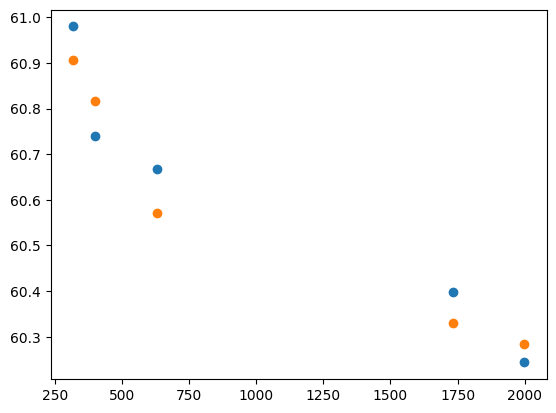

In [74]:
plt.scatter(df_indep_test['Per Capita Income($) (X2)'], df_dep_test)
plt.scatter(df_indep_test['Per Capita Income($) (X2)'], predicted)

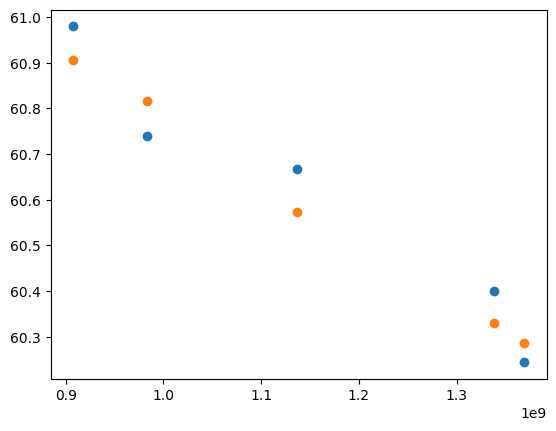

In [75]:
plt.scatter(df_indep_test['Population (X3)'], df_dep_test)
plt.scatter(df_indep_test['Population (X3)'], predicted)

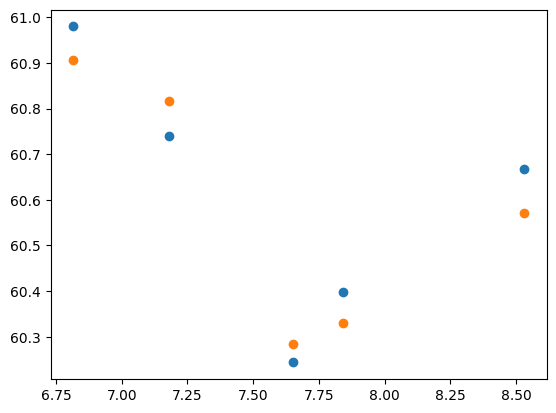

In [76]:
plt.scatter(df_indep_test['Unemployment(X4)'], df_dep_test)
plt.scatter(df_indep_test['Unemployment(X4)'], predicted)

In [77]:
# change dependent variable test set into numpy array
dep = np.array(df_dep_test)

#calculate r2 score
r1 = r2_score(dep, predicted)
print(r1)


0.9196242091000546


In [78]:
#calculate the mse
mse1 = mean_squared_error(dep, predicted)
print(mse1)

#will be used for adjusted r^2 later
number_predictor1= len(df_indep_train.columns)

0.0731297962410157


In [79]:
# while we considered 0.91962 r^2 and 0.073129 MSE to be good, using our analysis from above we decided to do a change in 
#relationship for one variable at a time.(to have more conclusive results.)
#thus for the second iteration we created, we decided to remain modelling land against unemployment and 
#population linearly but against per capita income as X^3.

In [80]:

# process for model 2

# filter out Temperature from the array
model2_indep = df_independent.loc[:,['Per Capita Income($) (X2)', 'Population (X3)', 'Unemployment(X4)']]

#transform per capita income
model2_indep_trans = transform_features_cube(model2_indep, 'Per Capita Income($) (X2)','Per Capita Income($)^2 (X2)^2', 'Per Capita Income($)^3 (X2)^3')

#model2_indep_trans = model2_indep.loc[:,['Per Capita Income($)^3 (X2)^3', 'Population (X3)', 'Unemployment(X4)']]
# dependent remains the same
print(model2_indep_trans)

    Per Capita Income($) (X2)  Population (X3)  Unemployment(X4)  \
0                         303        888941756             6.737   
1                         317        907574049             6.815   
2                         301        926351297             6.798   
3                         346        945261958             6.830   
4                         374        964279129             7.014   
5                         400        983281218             7.181   
6                         415       1002335230             7.279   
7                         413       1021434576             7.487   
8                         442       1040500054             7.709   
9                         443       1059633675             7.770   
10                        452       1078970907             7.957   
11                        471       1098313039             8.102   
12                        547       1117415123             8.360   
13                        628       1136264583  

In [81]:
# Process of linear regression model training

# split the data into training and test sets
df_indep_train, df_indep_test, df_dep_train, df_dep_test = split_data(model2_indep_trans, df_dependent, 100, 0.18)

# normalize the independent variables 
df_indep_train_z,_,_ = normalize_z(df_indep_train)
#print(df_indep_train_z)

# change the independent and dependent variables
new_indep = prepare_feature(df_indep_train_z)
new_dep = prepare_target(df_dep_train)

beta=np.zeros((6,1))
alpha=0.01
cont = True
iterations = 0
storage= 1000000000*10000000
while cont:
    cont = False
    iterations += 10
    beta, J_storage = gradient_descent_linreg(new_indep, new_dep, beta, alpha, iterations)
    if J_storage[-1]<storage:
        storage=J_storage[-1]
        print(J_storage)
        cont=True



# call predict method
predicted = predict_linreg(df_indep_test, beta)

[1798.59433432 1762.80061546 1727.71931819 1693.33625602 1659.63752548
 1626.60950039 1594.23882633 1562.51241517 1531.41743972 1500.94132855]
[1471.0717608  1441.79666121 1413.10419518 1384.98276398 1357.421
 1330.40776212 1303.93213125 1277.98340579 1252.55109738 1227.62492656
 1203.19481866 1179.25089966 1155.78349223 1132.78311176 1110.24046254
 1088.14643398 1066.49209691 1045.26869999 1024.46766613 1004.08058901]
[984.09922971 964.51551335 945.32152581 926.50951055 908.07186543
 890.00113969 872.29003088 854.93138191 837.91817821 821.2435448
 804.90074359 788.88317059 773.18435331 757.79794804 742.71773739
 727.9376277  713.45164662 699.25394066 685.33877284 671.70052038
 658.3336724  645.23282771 632.39269263 619.80807883 607.47390124
 595.385176   583.53701846 571.92464116 560.54335194 549.388552  ]
[538.45573411 527.74048069 517.23846211 506.94543491 496.85724007
 486.96980133 477.27912358 467.78129121 458.47246652 449.3488882
 440.4068698  431.64279821 423.05313224 414.634401

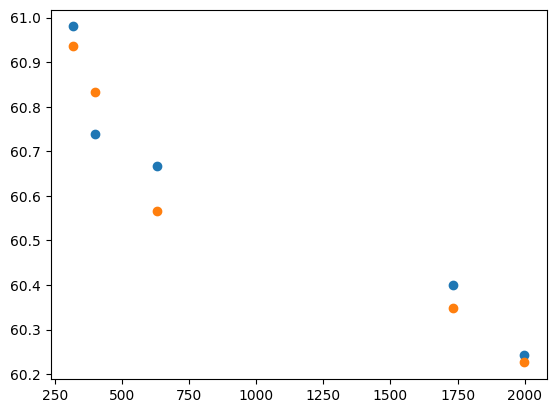

In [82]:
plt.scatter(df_indep_test['Per Capita Income($) (X2)'], df_dep_test)
plt.scatter(df_indep_test['Per Capita Income($) (X2)'], predicted)

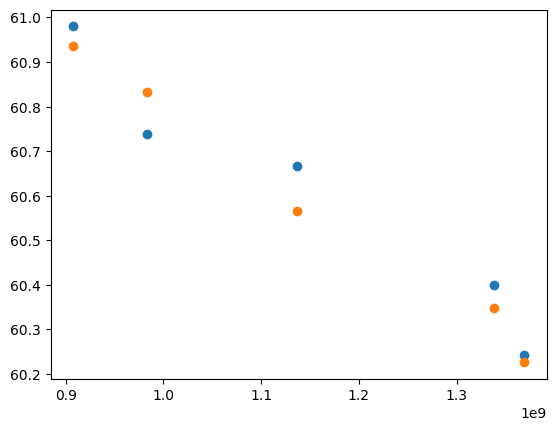

In [83]:
plt.scatter(df_indep_test['Population (X3)'], df_dep_test)
plt.scatter(df_indep_test['Population (X3)'], predicted)

In [84]:
# change dependent variable test set into numpy array
dep = np.array(df_dep_test)

#calculate r2 score
r2 = r2_score(dep, predicted)
print(r2)

0.9288597204040283


In [85]:
#calculate the mse
mse2 = mean_squared_error(dep, predicted)
print(mse2)

#will be used for adjusted r^2 later
number_predictor2= len(df_indep_train.columns)

0.057201594037640725


In [86]:
# as seen the r^2 improved from the previous r^2 however since th number of data points changes, r^2 is not a good predictor
#thus we decided to use mse which also decreased from the previous model
#since the relationship between land and per capita income were the only variables we change, we can conclude that 
#land follows per capita income more accurately with a cubic relationship. 
# thus keeping population linearly related and per capita income cubic related, we did our third and final iteration 
#modelling unemployment with log(e) instead

In [87]:
# Process for proposed model 3

model3_indep = df_independent.loc[:,['Per Capita Income($) (X2)', 'Population (X3)', 'Unemployment(X4)']]
model3_indep = transform_features_cube(model3_indep, 'Per Capita Income($) (X2)', 'Per Capita Income($)^3 (X2)^2','Per Capita Income($)^3 (X2)^3')
model3_indep = transform_features_ln(model3_indep, 'Unemployment(X4)', 'Unemployment_log (log(X4))')

print(model3_indep)

    Per Capita Income($) (X2)  Population (X3)  Per Capita Income($)^3 (X2)^2  \
0                         303        888941756                          91809   
1                         317        907574049                         100489   
2                         301        926351297                          90601   
3                         346        945261958                         119716   
4                         374        964279129                         139876   
5                         400        983281218                         160000   
6                         415       1002335230                         172225   
7                         413       1021434576                         170569   
8                         442       1040500054                         195364   
9                         443       1059633675                         196249   
10                        452       1078970907                         204304   
11                        47

In [88]:
# split the data into training and test sets
df_indep_train, df_indep_test, df_dep_train, df_dep_test = split_data(model3_indep, df_dependent, 100, 0.18)

# normalize the independent variables 
df_indep_train_z,_,_ = normalize_z(df_indep_train)


# change the independent and dependent variables
new_indep = prepare_feature(df_indep_train_z)
new_dep = prepare_target(df_dep_train)

beta=np.zeros((6,1))
alpha=0.01
cont = True
iterations = 0
storage= 1000000000*10000000
while cont:
    cont = False
    iterations += 100
    beta, J_storage = gradient_descent_linreg(new_indep, new_dep, beta, alpha, iterations)
    if J_storage[-1]<storage:
        storage=J_storage[-1]
        cont=True

# call gradient descent function

# call predict method

print(beta)

[[ 6.05817872e+01]
 [-8.56221312e-01]
 [-5.29529899e-02]
 [ 1.50180415e+00]
 [-8.70057660e-01]
 [-6.16429007e-02]]


In [89]:
# change target to numpy array
beta_array = np.array(beta)

test_dep = prepare_target(df_dep_test)
predicted_ln = predict_linreg(df_indep_test, beta_array)

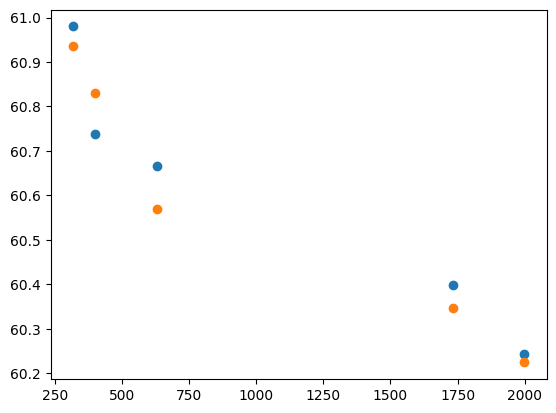

In [90]:
plt.scatter(df_indep_test['Per Capita Income($) (X2)'], test_dep)
plt.scatter(df_indep_test['Per Capita Income($) (X2)'], predicted_ln)

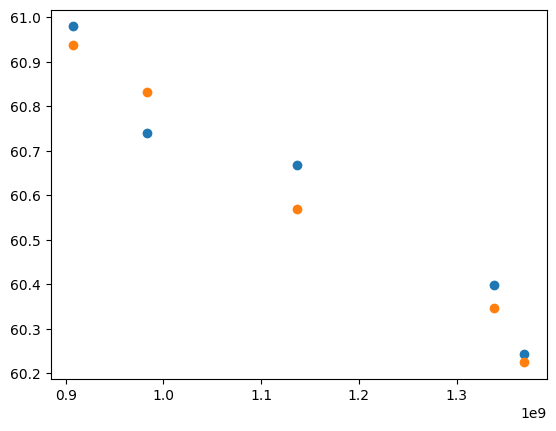

In [91]:
plt.scatter(df_indep_test['Population (X3)'], test_dep)
plt.scatter(df_indep_test['Population (X3)'], predicted_ln)

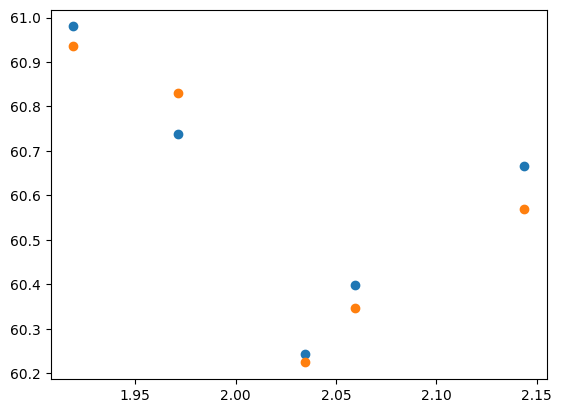

In [92]:
plt.scatter(df_indep_test['Unemployment_log (log(X4))'], test_dep)
plt.scatter(df_indep_test['Unemployment_log (log(X4))'], predicted_ln)

In [93]:
# calculate mse of new model
#calculate new r2 of new proposed model
r3 = r2_score(test_dep, predicted_ln)
print(r3)
mse3 = mean_squared_error(test_dep, predicted_ln)
print(mse3)

#will be used for adjusted r^2 later
number_predictor3= len(df_indep_train.columns)

0.9315786951062522
0.05417056257773321


In [94]:
print([r1,mse1,number_predictor1],[r2,mse2,number_predictor2],[r3,mse3,number_predictor3])

[0.9196242091000546, 0.0731297962410157, 3] [0.9288597204040283, 0.057201594037640725, 5] [0.9315786951062522, 0.05417056257773321, 5]


In [ ]:
#selection of metrics

In [95]:
# in the code, we covered 3 different models

# for model 1, r2 score = 0.9196242091000546, MSE = 0.0731297962410157
# for model 2, r2 score = 0.9288597181646723, MSE = 0.0572015852753591
# for model 3, r2 score = 0.9315786951062522, MSE = 0.05417056257773321

In [ ]:

#r^2 is not a good predictor in our case because it is affected by the number of datapoints we give and in model 2 
#and 3 the x^3 function increases the number of features by a significant amount while the number of data points 
#remain the same.
#similarly (and similar reasoning as above) mse is unable to decipher overfitting issues

#thus we decided to use adjusted r^2 which allows for fair comparisons between models with different numbers 
#of predictors. This is particularly important when comparing models with varying levels of complexity for 
#e.g model two and three is more complex than model 1 due to cubic relation introducing more features while number 
#of predicted datapoints stay the same.




In [97]:
adjusted_r1=adjusted_r(r1,31,number_predictor1)
adjusted_r2=adjusted_r(r2,31,number_predictor2)
adjusted_r3=adjusted_r(r3,31,number_predictor3)

In [99]:
print(adjusted_r1,adjusted_r2,adjusted_r3)

0.9106935656667273 0.914631664484834 0.9178944341275027


In [ ]:
#after three iterations our team concluded that the best model was the last one since it gave the smallest adjusted r square. 
